In [1]:
import pandas as pd
import uproot
import awkward as ak
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import math
import pickle

In [30]:
import ProjectPackage.DataExtraction as de
import ProjectPackage.Kinematic as km
from ProjectPackage import Cut

In [2]:
import Filter
import Scalers
import AllRuns

In [33]:
DataFolder = 'D:/Data_muons/dimuonData_LHC18m'
SavingFolder = 'Save/'

DataFolderMC = 'D:/Data_muons/dimuonData_LHC18mMC'
SavingFolderMC = 'Save_MC/'

all_runs_available = os.listdir(SavingFolder)

In [4]:
all_runs_available

['290222',
 '290223',
 '290254',
 '290293',
 '290297',
 '290323',
 '290327',
 '290350',
 '290374',
 '290375',
 '290401',
 '290404',
 '290411',
 '290418',
 '290420',
 '290421',
 '290423',
 '290427',
 '290428',
 '290456',
 '290458',
 '290459',
 '290467',
 '290469',
 '290499',
 '290501',
 '290538',
 '290539',
 '290540',
 '290544',
 '290549',
 '290553',
 '290590',
 '290612',
 '290613',
 '290614',
 '290615',
 '290627',
 '290632',
 '290645',
 '290658',
 '290660',
 '290665',
 '290687',
 '290692',
 '290696',
 '290699',
 '290721',
 '290742',
 '290764',
 '290766',
 '290769',
 '290774',
 '290776',
 '290787',
 '290790',
 '290848',
 '290853',
 '290860',
 '290862',
 '290892',
 '290894',
 '290895',
 '290932',
 '290935',
 '290943',
 '290944',
 '290948',
 '290975',
 '290976',
 '290979',
 '290980',
 '291002',
 '291003',
 '291004',
 '291005',
 '291035',
 '291037',
 '291041',
 '291065',
 '291066',
 '291100',
 '291110',
 '291263',
 '291265',
 '291282',
 '291283',
 '291284',
 '291285',
 '291286',
 '291360',

In [5]:
len(all_runs_available)

182

In [21]:
size = 0
for r in all_runs_available:
    size += round(os.path.getsize(f'{SavingFolder}{r}') / 1e3, 2)
print(size)

0.0


In [6]:
H = AllRuns.all_hist_all_runs(SavingFolder, all_runs_available)


Run : 290222

Run : 290223

Run : 290254

Run : 290293

Run : 290297

Run : 290323

Run : 290327

Run : 290350

Run : 290374

Run : 290375

Run : 290401

Run : 290404

Run : 290411

Run : 290418

Run : 290420

Run : 290421

Run : 290423

Run : 290427

Run : 290428

Run : 290456

Run : 290458

Run : 290459

Run : 290467

Run : 290469

Run : 290499

Run : 290501

Run : 290538

Run : 290539

Run : 290540

Run : 290544

Run : 290549

Run : 290553

Run : 290590

Run : 290612

Run : 290613

Run : 290614

Run : 290615

Run : 290627

Run : 290632

Run : 290645

Run : 290658

Run : 290660

Run : 290665

Run : 290687

Run : 290692

Run : 290696

Run : 290699

Run : 290721

Run : 290742

Run : 290764

Run : 290766

Run : 290769

Run : 290774

Run : 290776

Run : 290787

Run : 290790

Run : 290848

Run : 290853

Run : 290860

Run : 290862

Run : 290892

Run : 290894

Run : 290895

Run : 290932

Run : 290935

Run : 290943

Run : 290944

Run : 290948

Run : 290975

Run : 290976

Run : 290979

Run :

In [31]:
de.save_dict_hist('Histogram_all_runs.pkl', H)

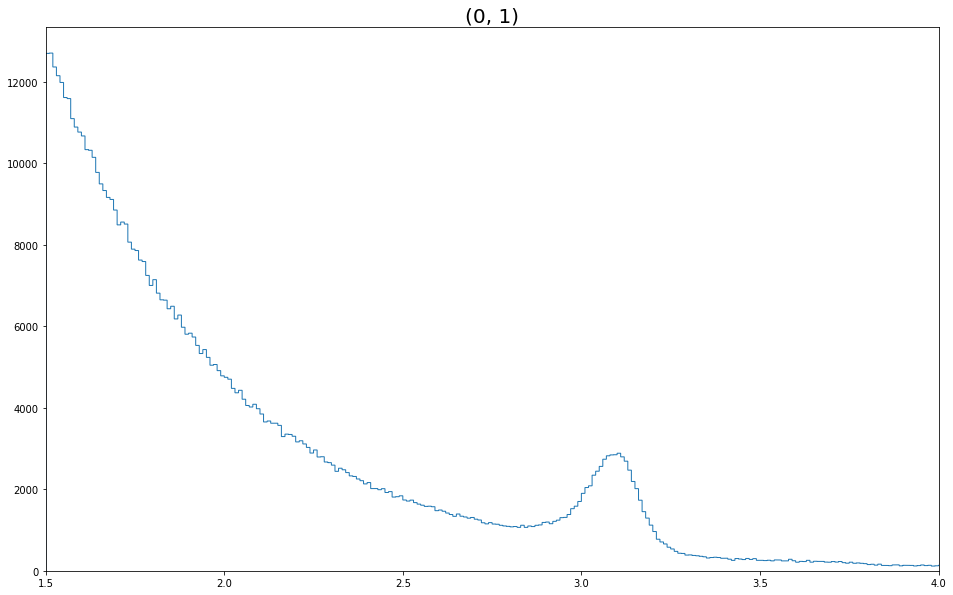

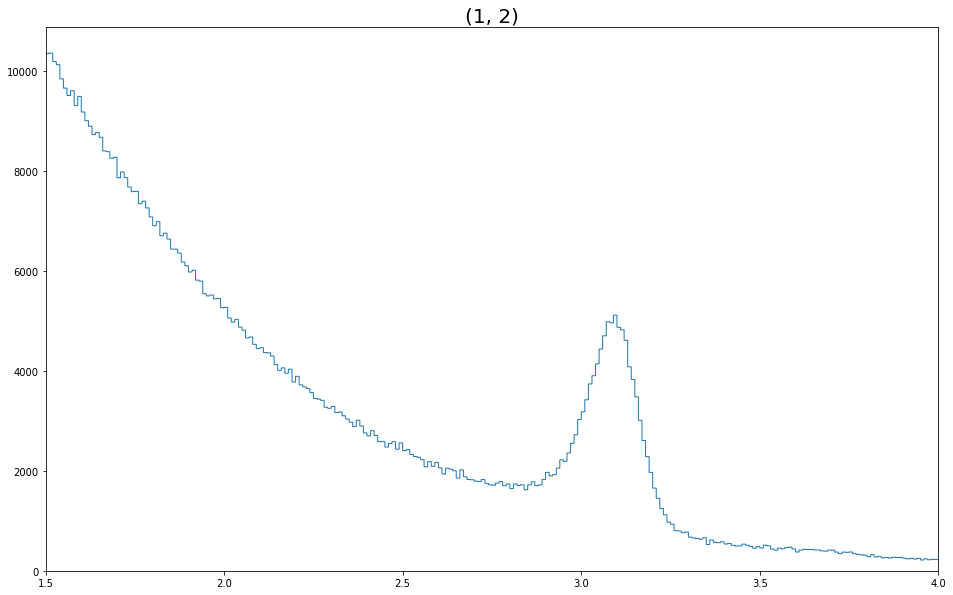

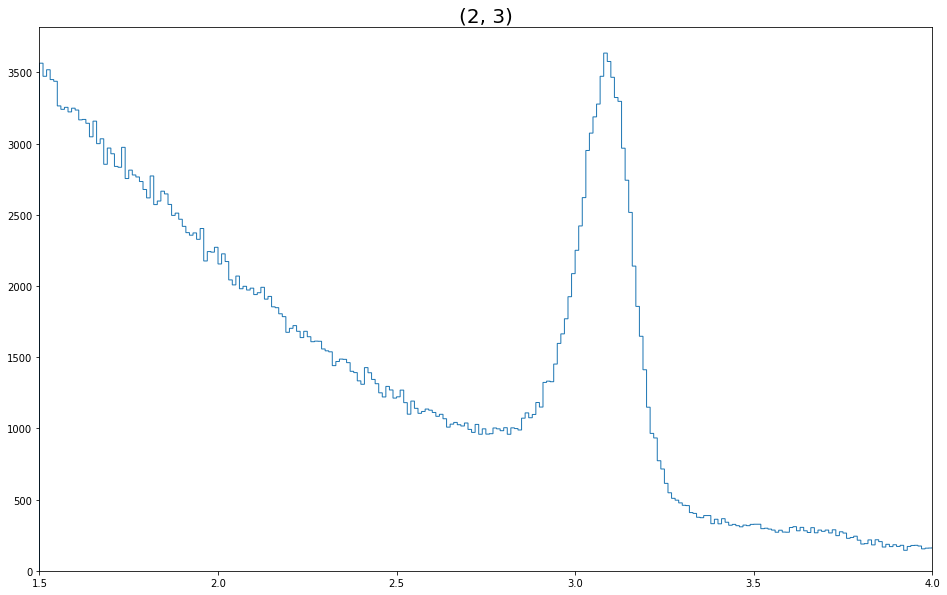

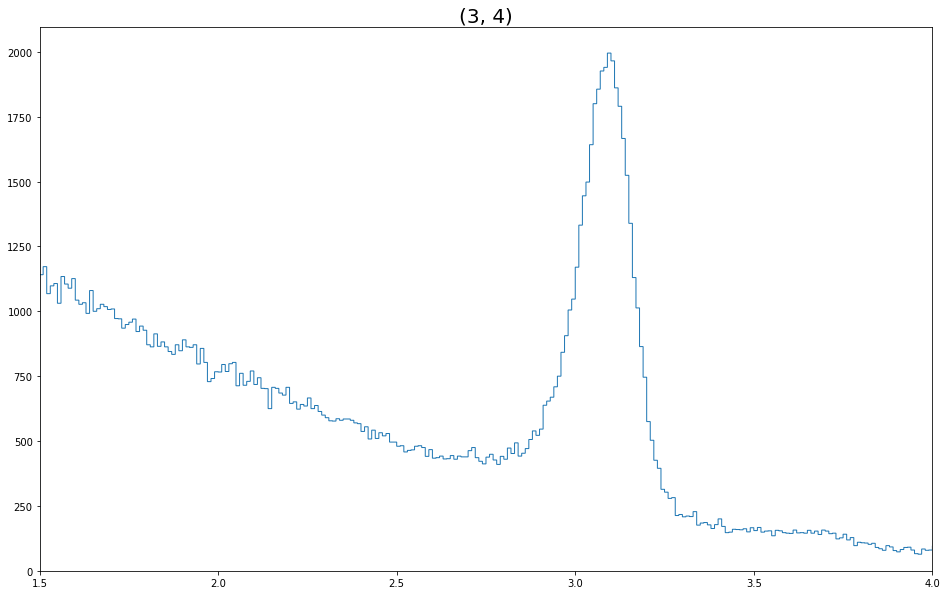

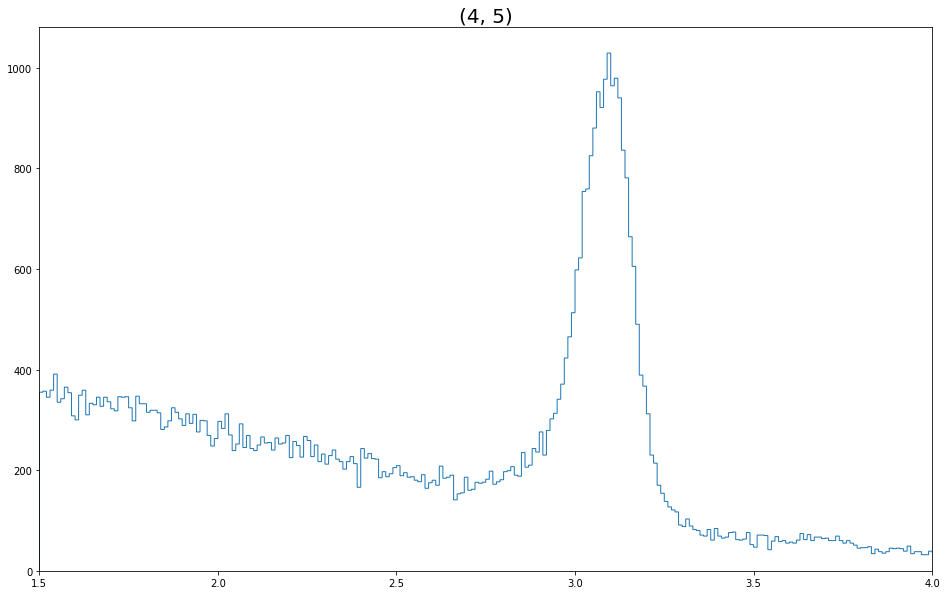

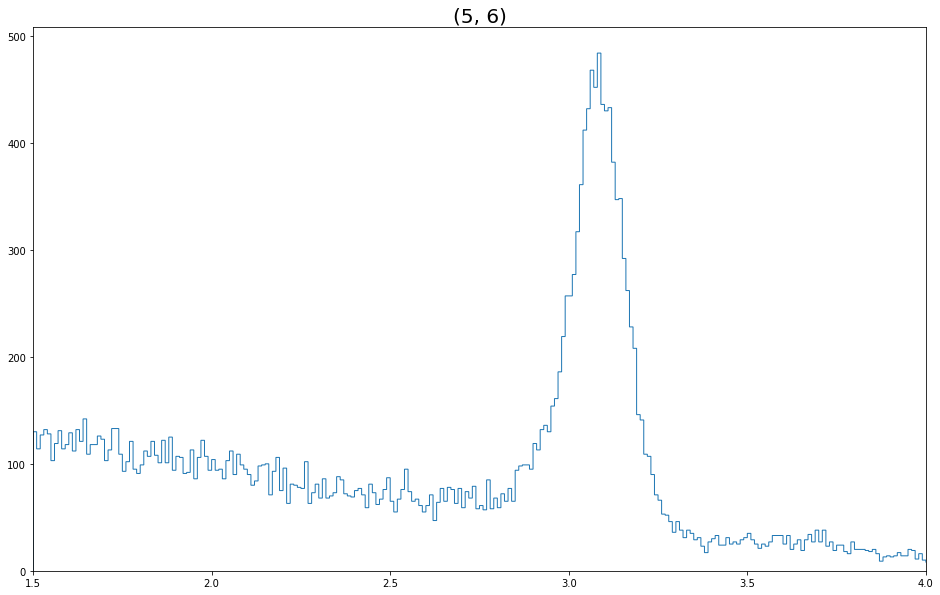

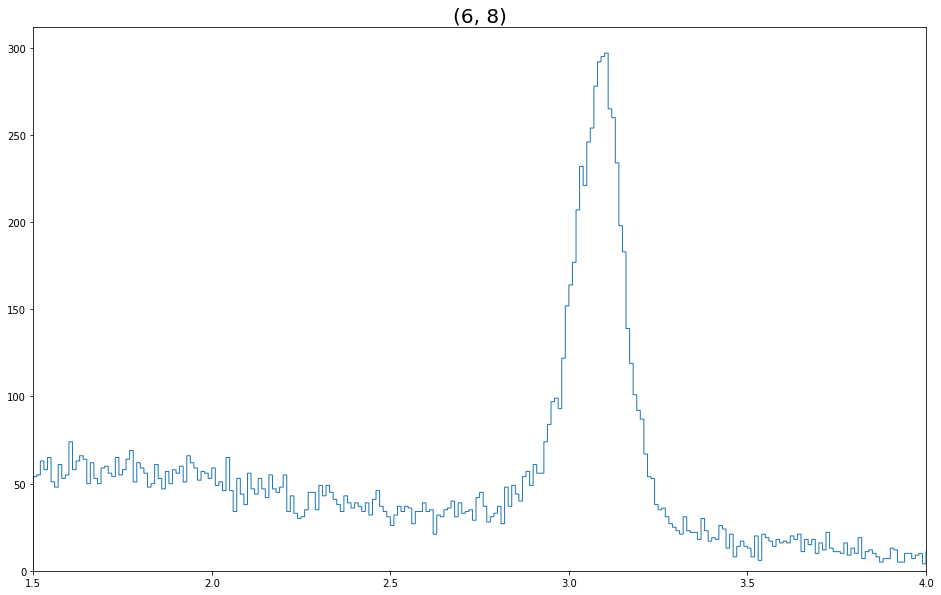

In [7]:
for k, v in H.items():
    y, x = v
    plt.figure(figsize=(16,10))
    plt.title(k, fontsize=20)
    plt.xlim(1.5,4)
    plt.stairs(y, x)

In [8]:

counts = np.zeros(H[0,1][0].shape)
bins = H[0,1][1]
for v in H.values():
    counts = counts + v[0]

hist_all_pt = (counts, bins)

In [42]:
counts

array([1.0895e+04, 1.0902e+04, 1.0836e+04, 1.0577e+04, 1.0373e+04,
       9.9920e+03, 1.0056e+04, 9.9580e+03, 9.6950e+03, 9.7570e+03,
       9.4870e+03, 9.3020e+03, 9.1890e+03, 9.0890e+03, 9.0290e+03,
       8.8120e+03, 8.5890e+03, 8.4540e+03, 8.2940e+03, 8.3510e+03,
       8.0390e+03, 8.0430e+03, 7.9560e+03, 7.8130e+03, 7.5290e+03,
       7.5310e+03, 7.4560e+03, 7.4420e+03, 7.0630e+03, 6.9210e+03,
       6.8850e+03, 6.7990e+03, 6.6500e+03, 6.6540e+03, 6.6130e+03,
       6.5480e+03, 6.3150e+03, 6.3210e+03, 6.1290e+03, 6.1510e+03,
       6.0060e+03, 5.8230e+03, 5.8000e+03, 5.6020e+03, 5.5990e+03,
       5.4560e+03, 5.3740e+03, 5.3220e+03, 5.2570e+03, 5.1870e+03,
       5.1160e+03, 5.1400e+03, 5.0350e+03, 4.9380e+03, 4.8120e+03,
       4.7920e+03, 4.6120e+03, 4.6270e+03, 4.4710e+03, 4.4970e+03,
       4.3800e+03, 4.2570e+03, 4.2410e+03, 4.2220e+03, 4.2000e+03,
       4.0210e+03, 3.9780e+03, 3.8530e+03, 3.9680e+03, 3.7560e+03,
       3.6720e+03, 3.7110e+03, 3.6980e+03, 3.6140e+03, 3.4000e

In [9]:
h = hist_all_pt

In [10]:
new_x = np.array([round(b, 1) for i, b in enumerate(bins) if i%10==0])

In [111]:
len(new_x)

86

In [11]:
new_y = np.array([h[0][10*i:10 * (i+1)].sum() for i in range(len(h[0])//10)])

In [51]:
i = 0
h[0][i:10*(i+1)].sum()
len(h[0])//10

85

In [113]:
len(new_y)

85

(1.5, 5.0)

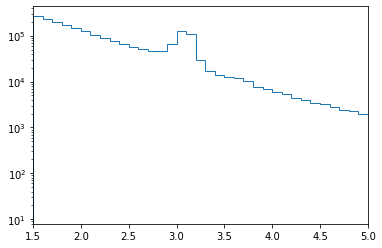

In [12]:
plt.stairs(new_y, new_x)
plt.semilogy()
plt.xlim(1.5,5)

In [13]:
h = (new_y, new_x)

In [14]:
from itertools import pairwise
from scipy.optimize import curve_fit

# x_c = np.array([(x1 + x2) / 2 for x1, x2 in pairwise(h[1])])
m, y = np.array([(x1 + x2) / 2 for x1, x2 in pairwise(h[1])]), h[0]

m_min, m_max = 2.7, 4  # range of the mass excess

i_min = np.where(m > m_min)[0][0]
i_max = np.where(m < m_max)[0][-1]

x_JP, y_JP = m[i_min:i_max + 1], y[i_min:i_max + 1]
idx = [i for i in range(i_min)] + [i for i in range(i_max, len(m))]
x_without_JP = m[idx]
y_without_JP = y[idx]

[]

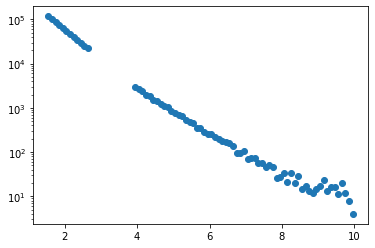

In [151]:
plt.scatter(x_without_JP, y_without_JP)
plt.semilogy()

In [16]:
def double_exp(z, A, k1, k2):
    return A * np.exp(-k1 * z) + np.exp(-k2 * z)

i_max = np.argwhere(x_without_JP==6.05)[0][0]
a, t1, t2 = curve_fit(double_exp, x_without_JP[0:i_max], y_without_JP[0:i_max], p0=(1000000, 1,-1))[0]

In [155]:
print(a, t1, t2)

1269346.0730707403 1.5319112483988335 2.285446264026363


In [123]:
i_max = np.argwhere(x_without_JP==6.05)
i_max

array([[33]], dtype=int64)

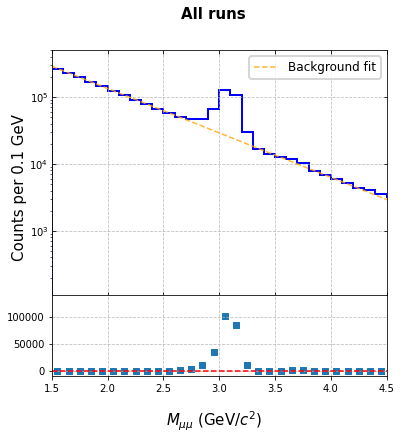

In [28]:
t = np.linspace(1.5, 5, 101)
bins = np.linspace(1.5, 5, 36)
fig, ax = plt.subplots(2,1, sharex=True, gridspec_kw={'height_ratios': [3,1]}, figsize=(6,6))
fig.suptitle(f'All runs', fontsize=15, fontweight='bold')

ax[0].set_xlim(1.5,4.5)
ax[0].semilogy()
ax[0].set_ylim(110,5e5)
ax[0].set_xlabel("$m_{\mu\mu}$ (GeV)", fontweight='bold', fontsize=12)
ax[0].tick_params(bottom=True, top=True, left=True, right=True)
ax[0].tick_params(direction="in")

ax[0].stairs(new_y, new_x, color='b', linewidth=2)
ax[0].plot(t, double_exp(t, a, t1, t2), c='orange', linestyle='dashed', alpha=0.8, label='Background fit')

leg = ax[0].legend(fontsize=12)
leg.get_frame().set_linewidth(2.0)
ax[0].grid(linestyle='dashed', alpha=0.8)

ax[1].scatter(m, h[0] - double_exp(m, a, t1, t2), marker='s')
ax[1].set_ylim(-10000,1.4e5)
ax[1].axhline(0, c='r', linestyle='dashed')
ax[1].grid(linestyle='dashed', alpha=0.8)
plt.subplots_adjust(wspace=0, hspace=0)

fig.text(0.5, 0.01, '$M_{\mu\mu}$ (GeV/$c^2$)', ha='center', fontsize=15)
fig.text(0.05, 0.4, 'Counts per 0.1 GeV', ha='center', fontsize=15, rotation='vertical')
plt.savefig('Figures/Invariant mass all p_t.pdf')

In [40]:
def all_hist_all_runs(folder_saving, runs_list):
    p_t_ranges = [(i, i + 1) for i in range(6)] + [(6, 8)]

    all_h = {}
    for run in runs_list:
        print(f'\nRun : {run}')
        if str(run) in os.listdir(folder_saving) and len(os.listdir(f'{folder_saving}/{run}')) == 2:

            f = f'{folder_saving}{run}/{run}_histograms.pkl'
            h = de.read_dict_hist(f)
            if not all_h:
                all_h = h.copy()

            for r in p_t_ranges:
                all_h[r] = (all_h[r][0] + h[r][0], h[r][1])

    return all_h

In [41]:
H_MC = all_hist_all_runs(SavingFolderMC, os.listdir(SavingFolderMC))


Run : 290254

Run : 290293

Run : 290297

Run : 290300

Run : 290323

Run : 290324

Run : 290327

Run : 290350

Run : 290374

Run : 290375

Run : 290401

Run : 290404

Run : 290411

Run : 290418

Run : 290420

Run : 290421

Run : 290423

Run : 290425

Run : 290427

Run : 290428

Run : 290456

Run : 290458

Run : 290459

Run : 290467

Run : 290469

Run : 290499

Run : 290501

Run : 290538

Run : 290539

Run : 290540

Run : 290544

Run : 290549

Run : 290550

Run : 290553

Run : 290590

Run : 290612

Run : 290613

Run : 290614

Run : 290615

Run : 290627

Run : 290632

Run : 290658

Run : 290660

Run : 290665

Run : 290687

Run : 290692

Run : 290696

Run : 290699

Run : 290721

Run : 290742

Run : 290764

Run : 290766

Run : 290774

Run : 290776

Run : 290787

Run : 290790

Run : 290848

Run : 290853

Run : 290860

Run : 290862

Run : 290892

Run : 290894

Run : 290895

Run : 290932

Run : 290935

Run : 290944

Run : 290948

Run : 290975

Run : 290976

Run : 290980

Run : 291002

Run :

In [42]:
H_MC

{(0,
  1): (array([   7,    2,   10,    6,    4,    3,    9,    5,   12,    8,    5,
            0,   11,    8,    7,    7,    7,    9,   10,   15,    9,    6,
           13,    9,   15,   12,   10,   16,   16,   13,    5,   15,   23,
           20,   13,   14,   17,   22,   20,   18,   13,   14,   15,   23,
           24,   17,   26,   19,   25,   19,   31,   26,   24,   31,   28,
           23,   37,   41,   25,   36,   38,   26,   41,   35,   32,   35,
           44,   31,   41,   33,   42,   42,   50,   41,   51,   58,   54,
           43,   59,   55,   58,   50,   69,   66,   51,   74,   55,   60,
           63,   93,   81,   68,   72,   69,   76,   87,   74,   92,   86,
           82,   96,  100,  108,  101,   96,   84,  118,  111,   99,  121,
          128,  126,  132,  138,  116,  170,  138,  173,  163,  179,  184,
          191,  213,  241,  225,  262,  291,  303,  362,  342,  365,  402,
          472,  480,  533,  545,  572,  651,  760,  822,  905,  924, 1066,
         1084, 

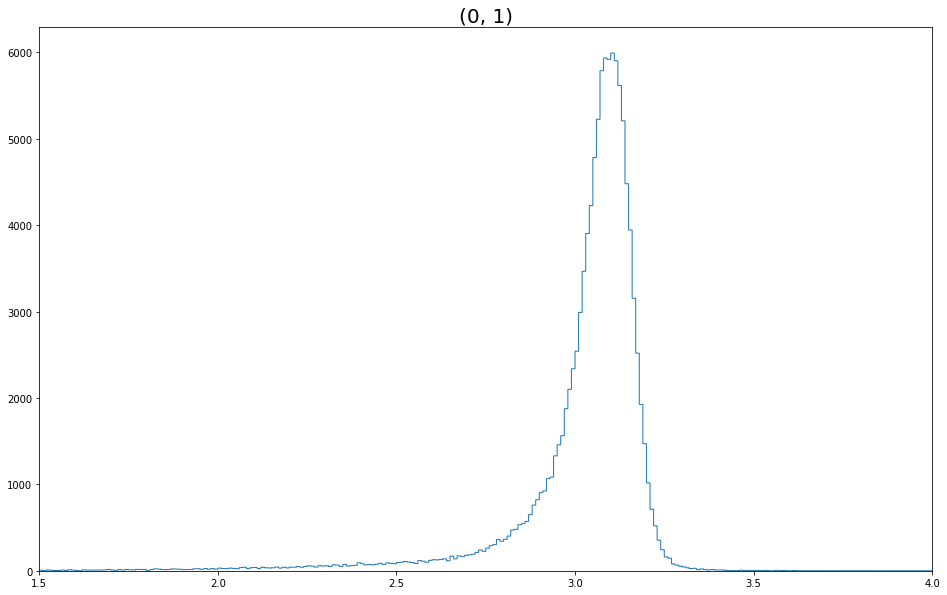

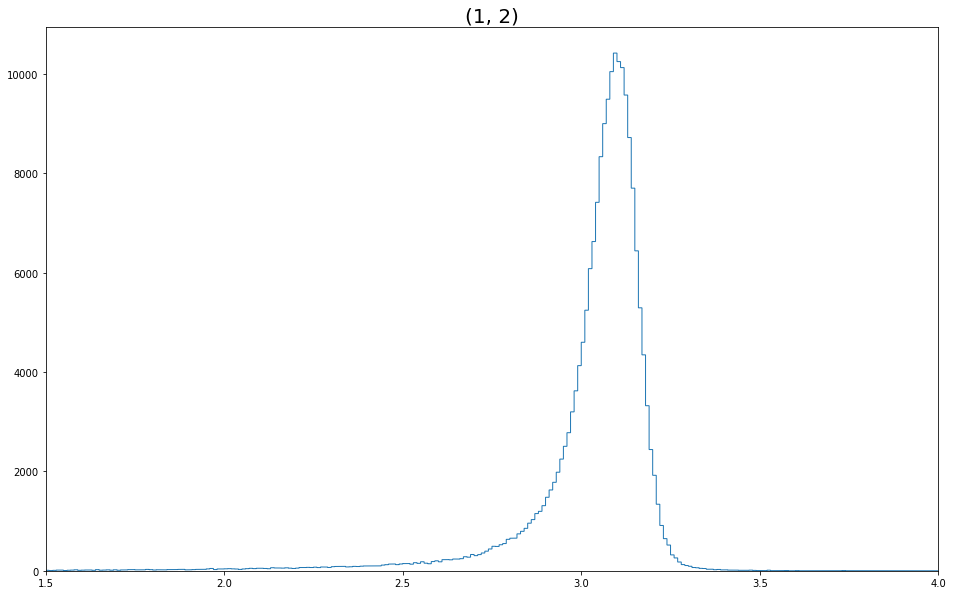

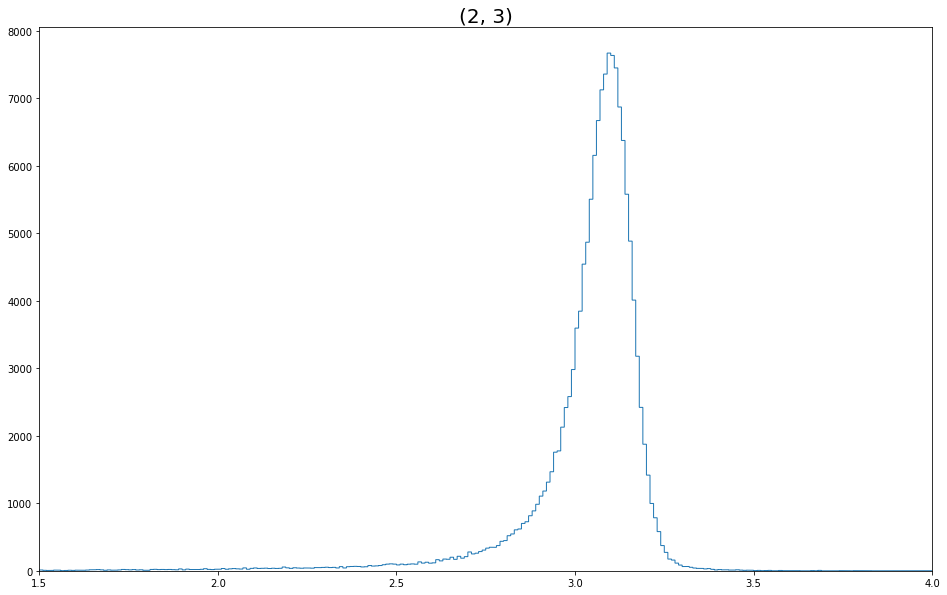

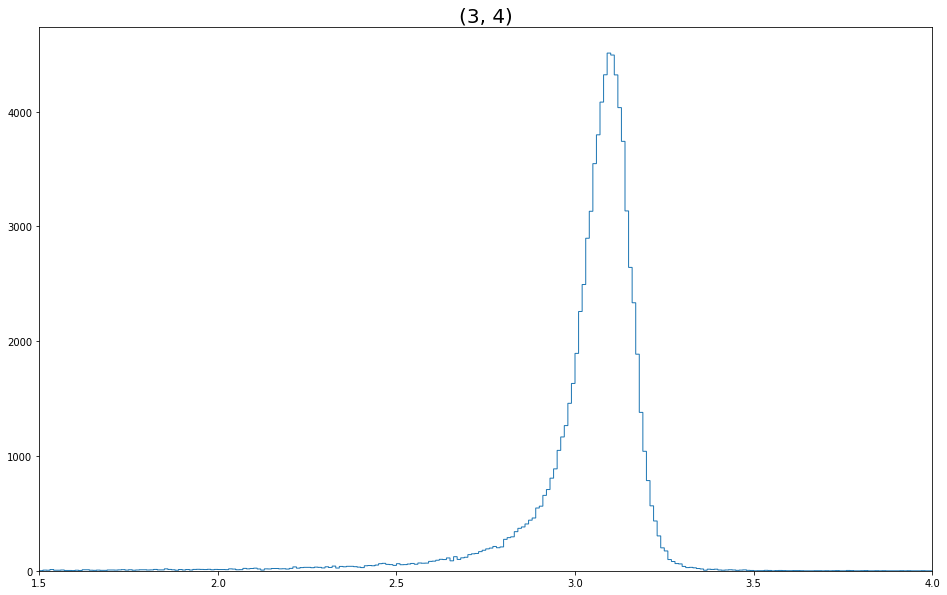

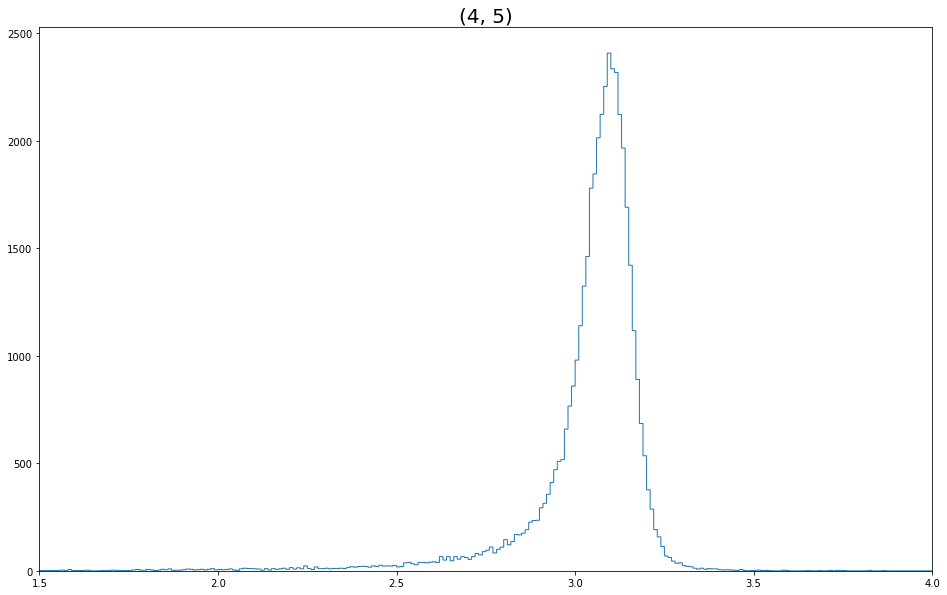

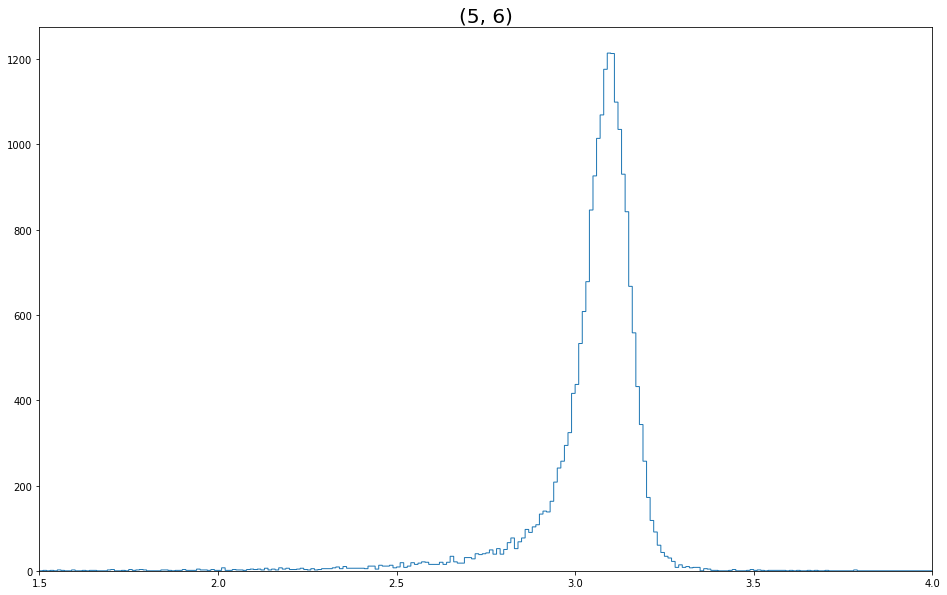

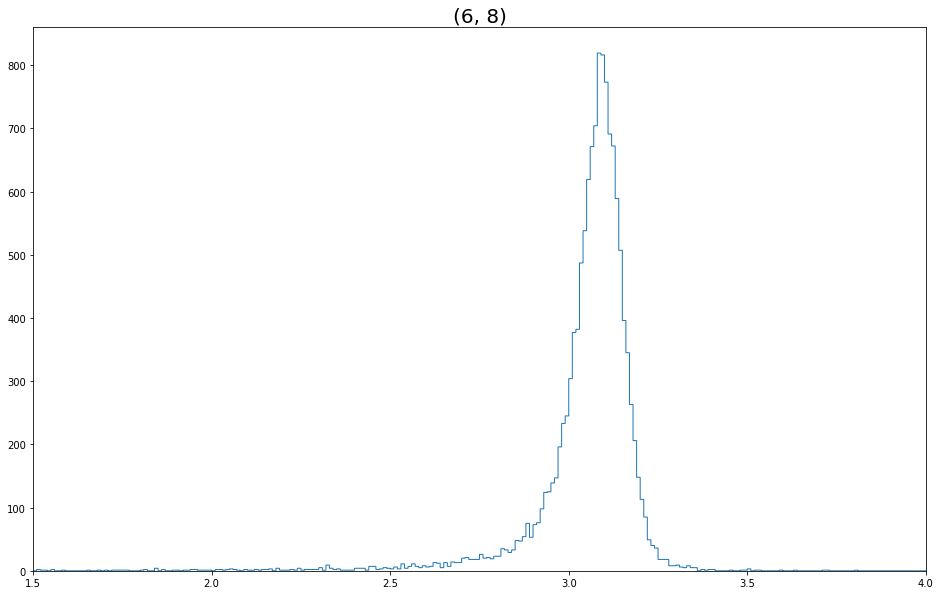

In [43]:
for k, v in H_MC.items():
    y, x = v
    plt.figure(figsize=(16,10))
    plt.title(k, fontsize=20)
    plt.xlim(1.5,4)
    plt.stairs(y, x)

In [44]:
de.save_dict_hist('Histogram_all_runs_MC.pkl', H_MC)

In [45]:
D_cmul = de.read_dict_hist('All_CMUL.pkl')

In [48]:
sum(D_cmul.values())

58233692

In [49]:
sum(D_cmul.values()) * 2588.2

150720441634.4

In [50]:
len(D_cmul)

182

In [59]:


tab = np.zeros((7,2))
for r in os.listdir(DataFolderMC):
    df = pd.read_csv(f'{SavingFolderMC}/{r}/MC_{r}_genrec.csv', usecols=['N_gen', 'N_rec'])
    tab += df.to_numpy()

df = pd.DataFrame(tab, columns=['N_gen', 'N_rec'])
df.to_csv('MC_Ngen_Nrec_all_runs.csv')

In [60]:
df

,N_gen,N_rec
0,749626.0,181227.0
1,1412999.0,339492.0
2,1177612.0,289352.0
3,748209.0,196385.0
4,427996.0,125628.0
5,236308.0,77764.0
6,204482.0,75564.0
